In [7]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from models import MLP
from datasets import load_from_folder, one_hot_encode
from metric import accuracy
np.random.seed(69)

In [2]:
path = './flowers/'
width = 320
height = 240

In [3]:
(train_data, train_label), (test_data, test_label) = load_from_folder(path, test_split=0.2, target_size=(width, height))

train_data = train_data.reshape(-1, height*width)
test_data = test_data.reshape(-1, height*width)

# test_label = one_hot_encode(test_label)
# train_label = one_hot_encode(train_label)

In [4]:
model = MLP(width*height, 3, learning_rate=0.1)
history = model.train(train_data, train_label, return_logs=True, epochs=50)

epoch 1/50: loss: 9.380996822539085; acc: 0.3333333333333333
epoch 2/50: loss: 7.642172169807898; acc: 0.3333333333333333
epoch 3/50: loss: 7.608326318724027; acc: 0.3333333333333333
epoch 4/50: loss: 7.574496939620311; acc: 0.3333333333333333
epoch 5/50: loss: 7.540685783068443; acc: 0.3333333333333333
epoch 6/50: loss: 7.506894783528375; acc: 0.3333333333333333
epoch 7/50: loss: 7.473126078180749; acc: 0.3333333333333333
epoch 8/50: loss: 7.439382027579223; acc: 0.3333333333333333
epoch 9/50: loss: 7.405665238273709; acc: 0.3333333333333333
epoch 10/50: loss: 7.3719785875625545; acc: 0.3333333333333333
epoch 11/50: loss: 7.338325250536974; acc: 0.3333333333333333
epoch 12/50: loss: 7.304708729585043; acc: 0.3333333333333333
epoch 13/50: loss: 7.2711328865237554; acc: 0.3333333333333333
epoch 14/50: loss: 7.237601977526113; acc: 0.3333333333333333
epoch 15/50: loss: 7.204120691004208; acc: 0.3333333333333333
epoch 16/50: loss: 7.1706941885983815; acc: 0.3333333333333333
epoch 17/50: l

[]

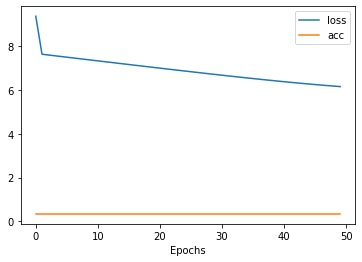

In [5]:
plt.plot(history['loss'], label='loss')
plt.plot(history['acc'], label='acc')
plt.xlabel("Epochs")
plt.legend()
plt.plot()

In [9]:
preds = model.predict(test_data)
print("test accuracy = {}".format(accuracy(test_label, preds)))

test accuracy = 0.35
